In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from pyecharts.charts import Pie
from pyecharts import options as opts
from collections import Counter

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('all_hero_init_attr.csv', encoding='gb18030')

In [3]:
data

,英雄名字,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,物理减伤率,法术防御,法术减伤率,移速,物理护甲穿透,法术护甲穿透,攻速加成,暴击几率,暴击效果,物理吸血,法术吸血,冷却缩减,攻击范围,韧性,生命回复,法力回复
0,盘古,10,8,8,6,3067,0,154,0.0,99,14.1%,50,7.6%,380,0,0,0,0,200%,0,0,0%,近程,0,76,0
1,猪八戒,10,8,10,6,3067,0,154,0.0,99,14.1%,50,7.6%,380,0,0,0,0,200%,0,0,0%,近程,0,76,0
2,嫦娥,10,10,10,5,1600,440,152,NaN,79,12.6%,50,7.6%,395,NaN,NaN,NaN,NaN,0%,NaN,NaN,0%,远程,NaN,46,15
3,瑶,10,7,8,5,3010,440,162,0.0,87,12.6%,50,7.6%,360,0,0,0,0,200%,0,0,0%,远程,0,43,16
4,上官婉儿,5,7,8,6,3215,440,152,0.0,79,12.6%,50,7.6%,396,0,0,0,0,0%,0,0,0%,远程,0,46,15
5,沈梦溪,6,8,10,6,3238,440,171,0.0,87,12.6%,50,7.6%,396,0,0,0,0,0%,0,0,0%,远程,0,46,15
6,伽罗,4,10,8,5,3173,490,205,0.0,84,12.2%,50,7.6%,350,0,0,0,0,0%,0,0,0%,远程,0,39,18
7,盾山,10,5,10,5,3041,125,171,0.0,79,11.6%,50,7.6%,530,0,0,0,0,200%,0,0,0%,近程,0,50,25
8,司马懿,4,3,8,7,3166,490,165,0.0,91,13.1%,50,7.6%,360,0,0,0,0,200%,0,0,0%,远程,0,45,18
9,孙策,8,5,8,4,3237,420,151,0.0,97,13.9%,50,7.6%,380,0%,0%,0%,0%,200%,0%,0%,0%,近程,0%,80,15


In [4]:
feature = ['英雄名字', '生存能力', '攻击伤害', '技能效果',
           '上手难度', '最大生命', '最大法力', '物理攻击',
           '法术攻击', '物理防御', '物理减伤率', '法术防御',
           '法术减伤率', '移速', '物理护甲穿透', '法术护甲穿透',
           '攻速加成', '暴击几率', '暴击效果', '物理吸血', '法术吸血',
           '冷却缩减', '攻击范围', '韧性', '生命回复', '法力回复']

In [5]:
data_init = data[feature]

In [6]:
data_init = data_init.fillna(0)

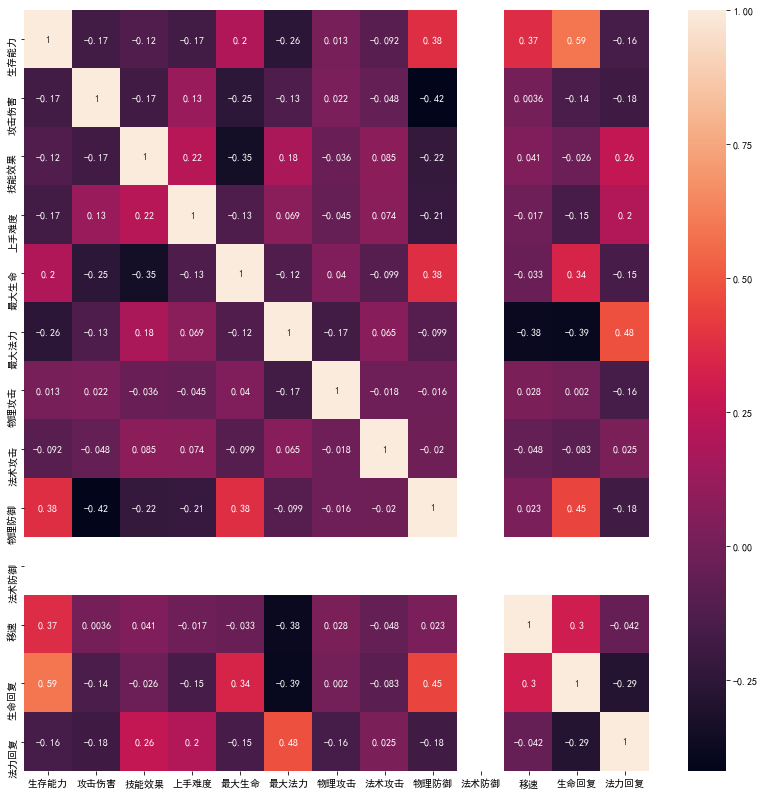

In [8]:
corr = data_init[feature].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
features_remain = ['生存能力', '攻击伤害', '技能效果',
                    '上手难度', '最大生命', '最大法力', '物理攻击',
                    '法术攻击', '物理防御', '物理减伤率', '移速', '攻击范围', '生命回复', '法力回复']

In [11]:
data_init = data_init[features_remain]
data_init

,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,物理减伤率,移速,攻击范围,生命回复,法力回复
0,10,8,8,6,3067,0,154,0.0,99,14.1%,380,近程,76,0
1,10,8,10,6,3067,0,154,0.0,99,14.1%,380,近程,76,0
2,10,10,10,5,1600,440,152,0.0,79,12.6%,395,远程,46,15
3,10,7,8,5,3010,440,162,0.0,87,12.6%,360,远程,43,16
4,5,7,8,6,3215,440,152,0.0,79,12.6%,396,远程,46,15
5,6,8,10,6,3238,440,171,0.0,87,12.6%,396,远程,46,15
6,4,10,8,5,3173,490,205,0.0,84,12.2%,350,远程,39,18
7,10,5,10,5,3041,125,171,0.0,79,11.6%,530,近程,50,25
8,4,3,8,7,3166,490,165,0.0,91,13.1%,360,远程,45,18
9,8,5,8,4,3237,420,151,0.0,97,13.9%,380,近程,80,15


In [12]:
data_init['物理减伤率'] = data_init['物理减伤率'].apply(lambda x: float(x.strip('%'))/100)

data_init['攻击范围'] = data_init['攻击范围'].map({'远程': 1, '近程': 0})

In [13]:
data_init

,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,物理减伤率,移速,攻击范围,生命回复,法力回复
0,10,8,8,6,3067,0,154,0.0,99,0.141,380,0,76,0
1,10,8,10,6,3067,0,154,0.0,99,0.141,380,0,76,0
2,10,10,10,5,1600,440,152,0.0,79,0.126,395,1,46,15
3,10,7,8,5,3010,440,162,0.0,87,0.126,360,1,43,16
4,5,7,8,6,3215,440,152,0.0,79,0.126,396,1,46,15
5,6,8,10,6,3238,440,171,0.0,87,0.126,396,1,46,15
6,4,10,8,5,3173,490,205,0.0,84,0.122,350,1,39,18
7,10,5,10,5,3041,125,171,0.0,79,0.116,530,0,50,25
8,4,3,8,7,3166,490,165,0.0,91,0.131,360,1,45,18
9,8,5,8,4,3237,420,151,0.0,97,0.139,380,0,80,15


In [14]:
ss = StandardScaler()
data_init = ss.fit_transform(data_init)

c:\users\wei.zhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\wei.zhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
gmm = GaussianMixture(n_components=20, covariance_type='full')
gmm.fit(data_init)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
prediction = gmm.predict(data_init)

In [17]:
data.insert(0, '分组', prediction)
data.to_csv('all_hero_init_attr_our.csv', index=False, sep=',', encoding='gb18030')

In [18]:
data

,分组,英雄名字,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,物理减伤率,法术防御,法术减伤率,移速,物理护甲穿透,法术护甲穿透,攻速加成,暴击几率,暴击效果,物理吸血,法术吸血,冷却缩减,攻击范围,韧性,生命回复,法力回复
0,9,盘古,10,8,8,6,3067,0,154,0.0,99,14.1%,50,7.6%,380,0,0,0,0,200%,0,0,0%,近程,0,76,0
1,9,猪八戒,10,8,10,6,3067,0,154,0.0,99,14.1%,50,7.6%,380,0,0,0,0,200%,0,0,0%,近程,0,76,0
2,15,嫦娥,10,10,10,5,1600,440,152,NaN,79,12.6%,50,7.6%,395,NaN,NaN,NaN,NaN,0%,NaN,NaN,0%,远程,NaN,46,15
3,13,瑶,10,7,8,5,3010,440,162,0.0,87,12.6%,50,7.6%,360,0,0,0,0,200%,0,0,0%,远程,0,43,16
4,13,上官婉儿,5,7,8,6,3215,440,152,0.0,79,12.6%,50,7.6%,396,0,0,0,0,0%,0,0,0%,远程,0,46,15
5,13,沈梦溪,6,8,10,6,3238,440,171,0.0,87,12.6%,50,7.6%,396,0,0,0,0,0%,0,0,0%,远程,0,46,15
6,5,伽罗,4,10,8,5,3173,490,205,0.0,84,12.2%,50,7.6%,350,0,0,0,0,0%,0,0,0%,远程,0,39,18
7,4,盾山,10,5,10,5,3041,125,171,0.0,79,11.6%,50,7.6%,530,0,0,0,0,200%,0,0,0%,近程,0,50,25
8,7,司马懿,4,3,8,7,3166,490,165,0.0,91,13.1%,50,7.6%,360,0,0,0,0,200%,0,0,0%,远程,0,45,18
9,9,孙策,8,5,8,4,3237,420,151,0.0,97,13.9%,50,7.6%,380,0%,0%,0%,0%,200%,0%,0%,0%,近程,0%,80,15


In [19]:
df = data[['分组', '英雄名字']]  # 获取需要的两列

grouped = df.groupby(['分组'])  # 以”分组“列来进行分组

In [22]:
k = []

# 获取分组后的 组和值，保存为字典，放到列表中
for name, group in grouped:
    k.append({name: list(group['英雄名字'].values)})

kk = []
for i in k:
    for k, v in i.items():
        kk.append(v)

length = []
key = []
for i in kk:
    key.append(str(i))
    length.append(len(i))

In [24]:
length

[6, 5, 5, 4, 2, 5, 1, 9, 1, 3, 2, 2, 3, 18, 5, 1, 5, 5, 9, 1]

In [29]:
pie = Pie()
pie.add("", [list(z) for z in zip(key, length)],
       radius=["30%", "75%"],
            center=["40%", "50%"],
            rosetype="radius")
pie.set_global_opts(
            title_opts=opts.TitleOpts(title="英雄聚类分布"),
            legend_opts=opts.LegendOpts(
                type_="scroll", pos_left="80%", orient="vertical"
            ),
        )
pie.render_notebook()